In [1]:
import meshplex
import numpy as np
import cv2
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from skimage.measure import marching_cubes
from collections import defaultdict
import math
from tqdm import tqdm 
import matplotlib.pyplot as plt
from xpinyin import Pinyin
import SimpleITK as sitk
import mcubes
from scipy.ndimage import zoom
def cal_3d_DCAR(S,V):
    tV = 4*math.pi/3*math.sqrt(S/(4*math.pi))**3
    return V/tV

def tetrahedron_volume(a, b, c, d):
    return np.abs(np.einsum('ij,ij->i', a-d, np.cross(b-d, c-d))) / 6


def transfer_data(image_path):
    img = io.imread(image_path)
    return img.astype(np.bool_)

In [2]:
import json 
with open("odds.json",'r', encoding='UTF-8') as f:
     odds_dict = json.load(f)

In [30]:
img_layer = {}
file_name = '陈国其'
path = 'manual_after_processing/'
alpha = odds_dict[file_name]
num = 64
for i in tqdm(range(0, num)):
    image_path = f'{path}{file_name}/' + str(i) + '.png'
    # data_matrix = np.zeros([512,512], dtype=np.uint8)
    if os.path.exists(image_path):
        img_b = transfer_data(image_path)
        idx = cv2.findContours(img_b.astype(np.uint8)*255,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        ss = idx[0][0].reshape(-1,2)
        # zz = np.ones((ss.shape[0],1))*i*odds_dict[file_name]
        # ss = np.concatenate((ss,zz),axis=1)
        # data_matrix[ss[:,0],ss[:,1]] = 1
        img_layer[i] = ss

100%|██████████| 64/64 [00:00<00:00, 435.25it/s]


In [41]:
for item in img_layer[5]:
    print(item)
    break

[242 225]


In [43]:
img_layer[5][:,1] 

array([241, 226], dtype=int32)

In [64]:
def get_vol_area_from_contours(contours1,contours2):
    ## contours1的点数必须小于contours2
    num_countours1 = contours1.shape[0]
    num_countours2 = contours2.shape[0]
    if num_countours1 > num_countours2:
        countours_temp = contours2
        contours2 = contours1
        contours1 = countours_temp
    else:
        pass
    # distance_index = []
    start_p = contours1[0,:]
    distance_arr = np.sqrt(np.sum((contours2 - start_p)**2,axis=1))
    min_distance_start_index = np.argmin(distance_arr)
    start_p_map = contours2[min_distance_start_index]
    cur_p = start_p
    cur_p_map = start_p_map
    contours2 = np.delete(contours2,min_distance_start_index,axis=0)
    for item in contours1[1:,:]:
        distance_arr = np.sqrt(np.sum((contours2 - item)**2,axis=1))
        min_distance_index = np.argmin(distance_arr)
        p_map = contours2[min_distance_index]
        contours2 = np.delete(contours2,min_distance_index,axis=0)
        
    return 

In [85]:
img_layer.shape

AttributeError: 'dict' object has no attribute 'shape'

In [71]:
a = get_vol_area_from_contours(img_layer[5],img_layer[6])

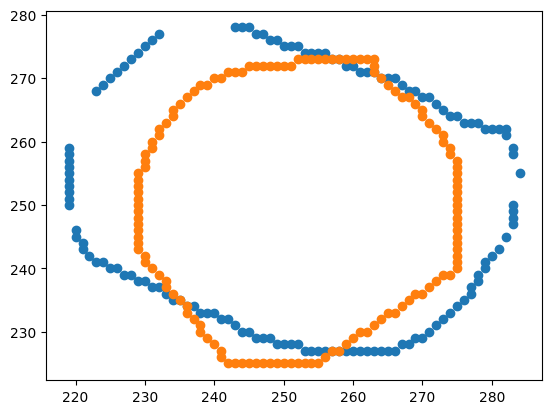

In [73]:
x = []
y = []
for item in a:
    x.append(item[0][0])
    y.append(item[0][1])

c = []
d = []
for item in a:
    c.append(item[1][0])
    d.append(item[1][1])

plt.scatter(x,y)
plt.scatter(c,d)


In [53]:
img_layer[6][5,:]

array([248, 229], dtype=int32)

In [25]:
img_layer

[array([[242.        , 225.        ,  16.00102407],
        [241.        , 226.        ,  16.00102407],
        [241.        , 227.        ,  16.00102407],
        [240.        , 228.        ,  16.00102407],
        [239.        , 229.        ,  16.00102407],
        [238.        , 230.        ,  16.00102407],
        [238.        , 231.        ,  16.00102407],
        [237.        , 232.        ,  16.00102407],
        [236.        , 233.        ,  16.00102407],
        [236.        , 234.        ,  16.00102407],
        [235.        , 235.        ,  16.00102407],
        [234.        , 236.        ,  16.00102407],
        [233.        , 237.        ,  16.00102407],
        [233.        , 238.        ,  16.00102407],
        [232.        , 239.        ,  16.00102407],
        [231.        , 240.        ,  16.00102407],
        [230.        , 241.        ,  16.00102407],
        [230.        , 242.        ,  16.00102407],
        [229.        , 243.        ,  16.00102407],
        [229